Summary Metrics
Total Sales: ₹2,297,200.86
Total Profit: ₹286,397.02
Average Profit Margin: 12.02%


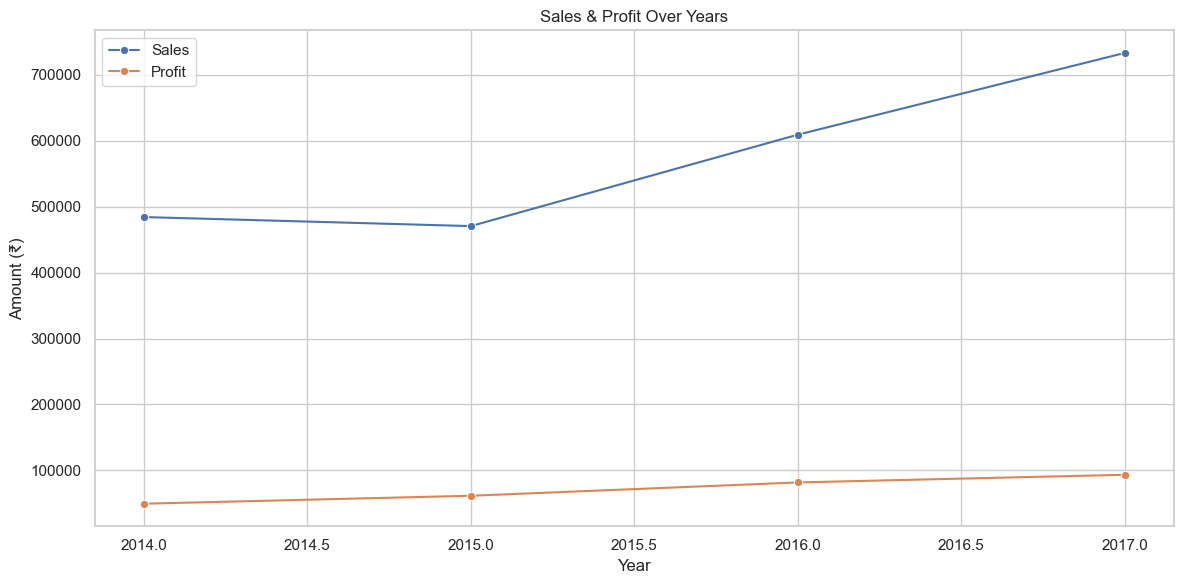

In [2]:
'''
Script name: exploratory_analysis.ipynb
Author: Md Golam Mohiuddin
Description: This scripts explores the patterns in the data.
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load cleaned data
df = pd.read_csv("../data/Superstore_cleaned.csv")

# Display Summary Metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit Margin'].mean()

print("Summary Metrics")
print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2%}")

# Trend over years
yearly = df.groupby('Order Year')[['Sales', 'Profit']].sum().reset_index()

# Plot
sns.lineplot(data=yearly, x='Order Year', y='Sales', label='Sales', marker='o')
sns.lineplot(data=yearly, x='Order Year', y='Profit', label='Profit', marker='o')
plt.title("Sales & Profit Over Years")
plt.ylabel("Amount (₹)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.savefig("../images/Sales_Profit_Over_Years.png")
plt.show()



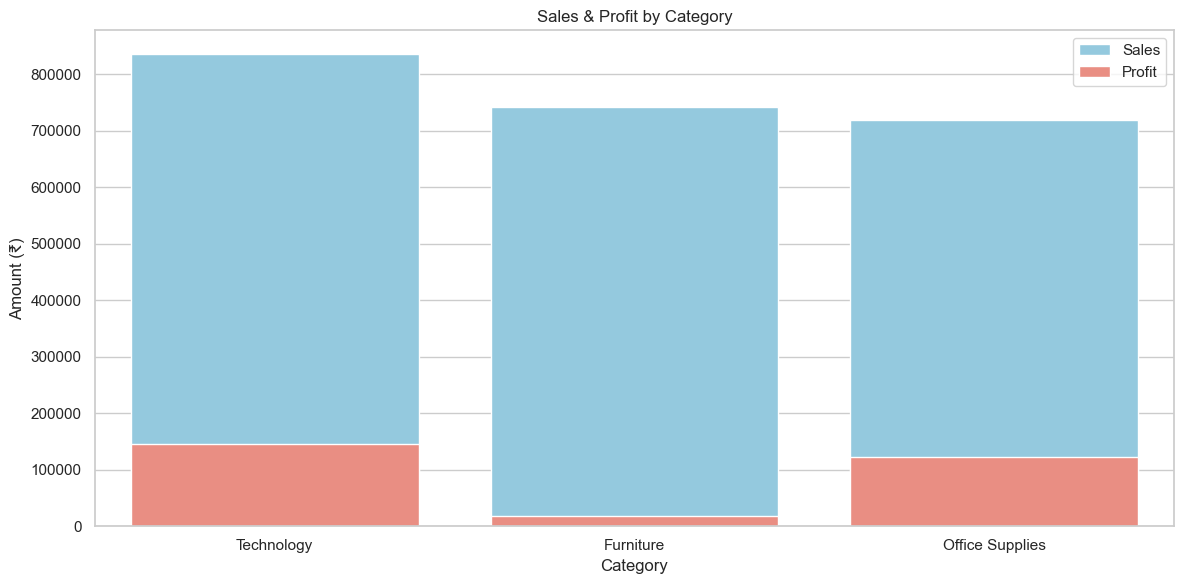

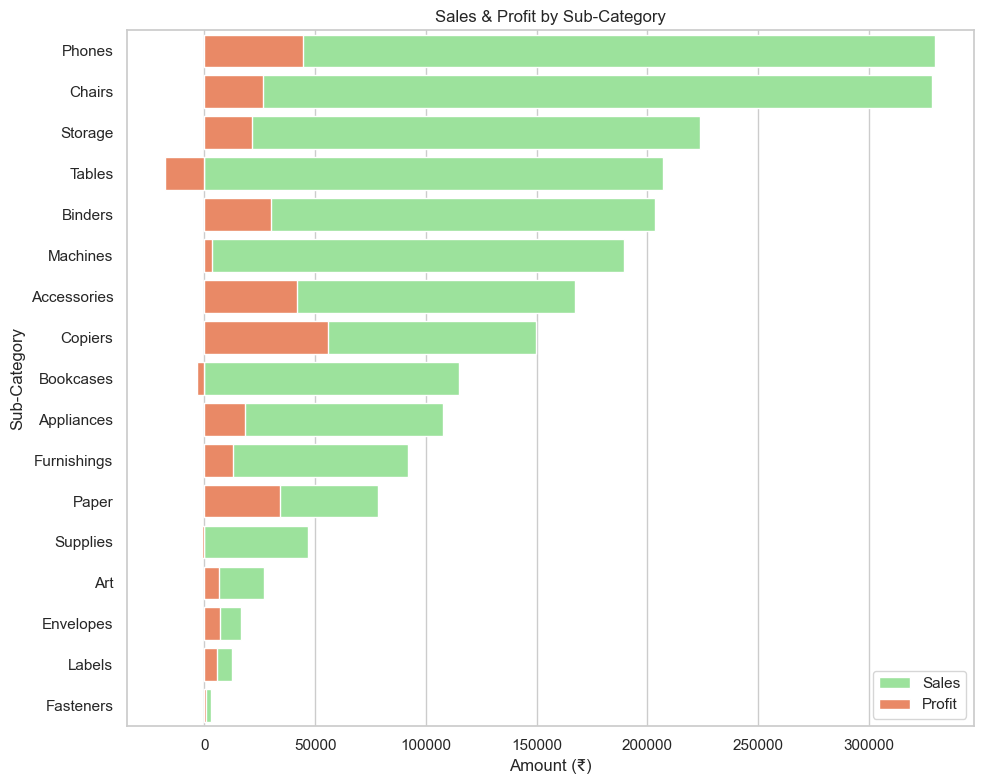

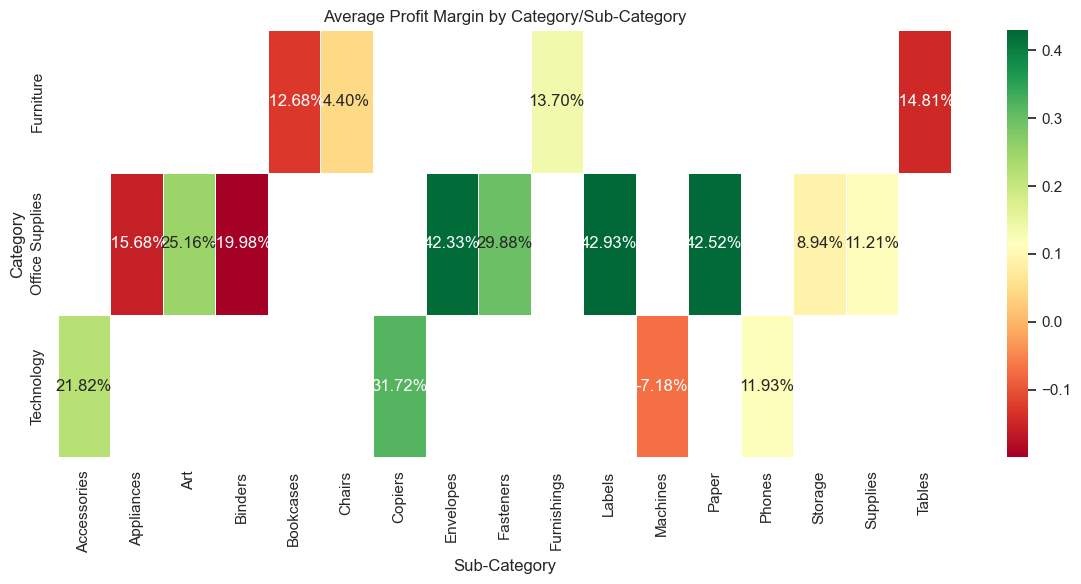

In [3]:
# Category-wise Sales & Profit
cat_perf = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()

# Barplot: Category Sales vs Profit
fig, ax = plt.subplots()
sns.barplot(data=cat_perf, x='Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=cat_perf, x='Category', y='Profit', color='salmon', label='Profit')
plt.title("Sales & Profit by Category")
plt.ylabel("Amount (₹)")
plt.legend()
plt.tight_layout()
plt.savefig("../images/Sales_Profit_by_Category.png")
plt.show()

# Sub-Category wise Sales & Profit
subcat_perf = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()

# Horizontal Barplot: Sub-Category
plt.figure(figsize=(10, 8))
sns.barplot(data=subcat_perf, y='Sub-Category', x='Sales', color='lightgreen', label='Sales')
sns.barplot(data=subcat_perf, y='Sub-Category', x='Profit', color='coral', label='Profit')
plt.title("Sales & Profit by Sub-Category")
plt.xlabel("Amount (₹)")
plt.legend()
plt.tight_layout()
plt.savefig("../images/Sales_Profit_by_Sub_Category.png")
plt.show()

# Pivot table for Profit Margin heatmap
pivot_margin = df.pivot_table(index='Category', columns='Sub-Category', values='Profit Margin', aggfunc='mean')

# Heatmap of Profit Margin
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_margin, annot=True, fmt=".2%", cmap="RdYlGn", linewidths=0.5)
plt.title("Average Profit Margin by Category/Sub-Category")
plt.tight_layout()
plt.savefig("../images/Average_Profit_Margin_by_Category_Sub_Category.png")
plt.show()


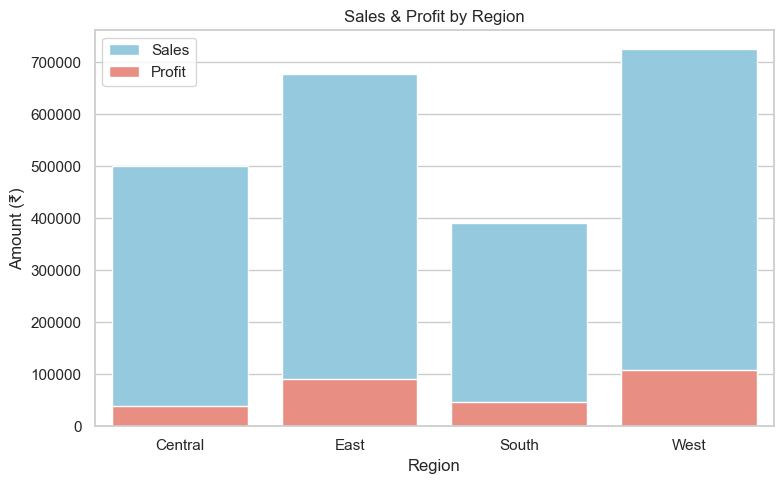

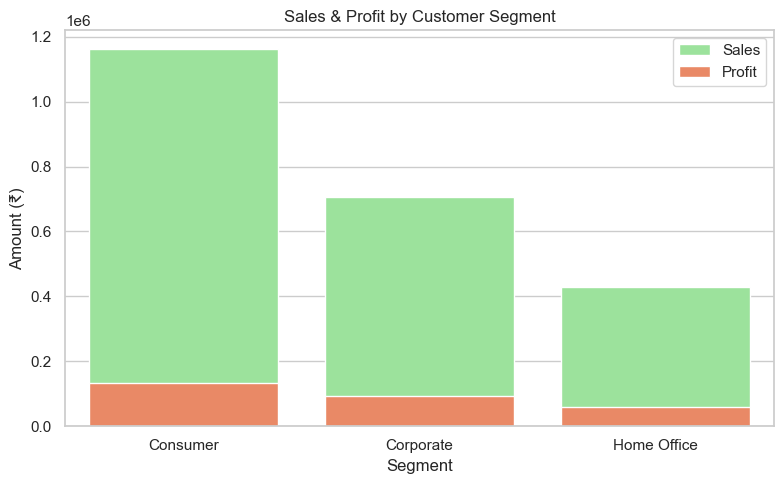

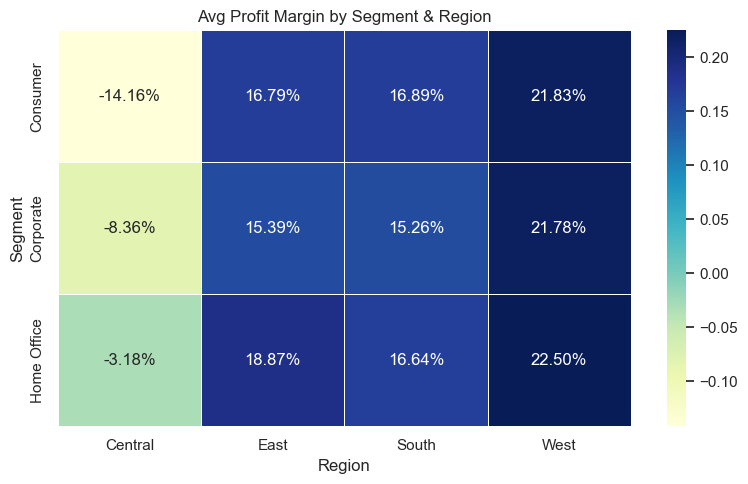

In [5]:
# Region-wise Sales & Profit
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=region_perf, x='Region', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=region_perf, x='Region', y='Profit', color='salmon', label='Profit')
plt.title("Sales & Profit by Region")
plt.ylabel("Amount (₹)")
plt.legend()
plt.tight_layout()
plt.savefig("../images/Sales_Profit_by_Region.png")
plt.show()

# Segment-wise Sales & Profit
segment_perf = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=segment_perf, x='Segment', y='Sales', color='lightgreen', label='Sales')
sns.barplot(data=segment_perf, x='Segment', y='Profit', color='coral', label='Profit')
plt.title("Sales & Profit by Customer Segment")
plt.ylabel("Amount (₹)")
plt.legend()
plt.tight_layout()
plt.savefig("../images/Sales_Profit_by_Customer_Segment.png")
plt.show()

# Heatmap of Segment vs Region: Avg Profit Margin
pivot_seg_region = df.pivot_table(index='Segment', columns='Region', values='Profit Margin', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_seg_region, annot=True, fmt=".2%", cmap="YlGnBu", linewidths=0.5)
plt.title("Avg Profit Margin by Segment & Region")
plt.tight_layout()
plt.savefig("../images/Average_Profit_Margin_by_Segment_Region.png")
plt.show()

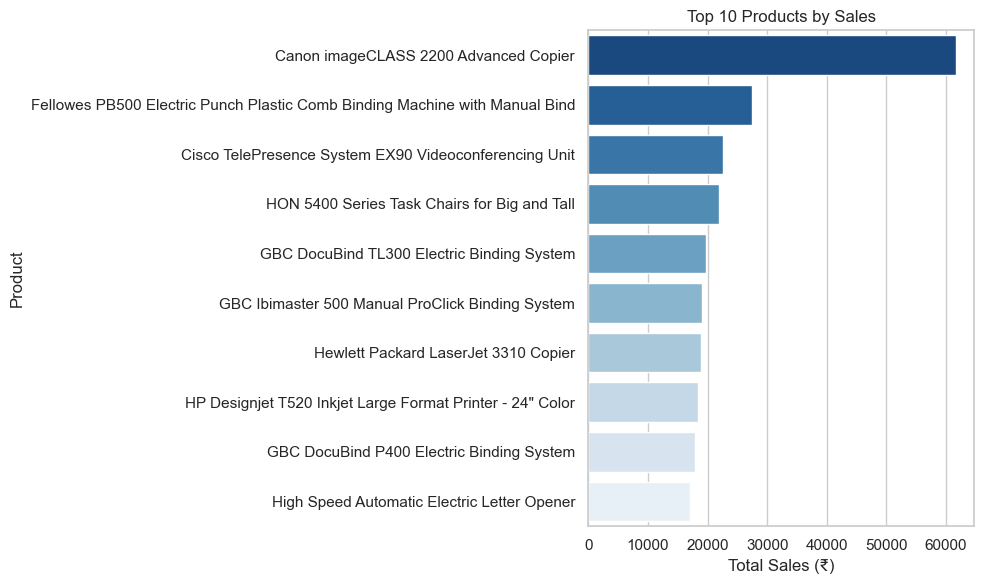

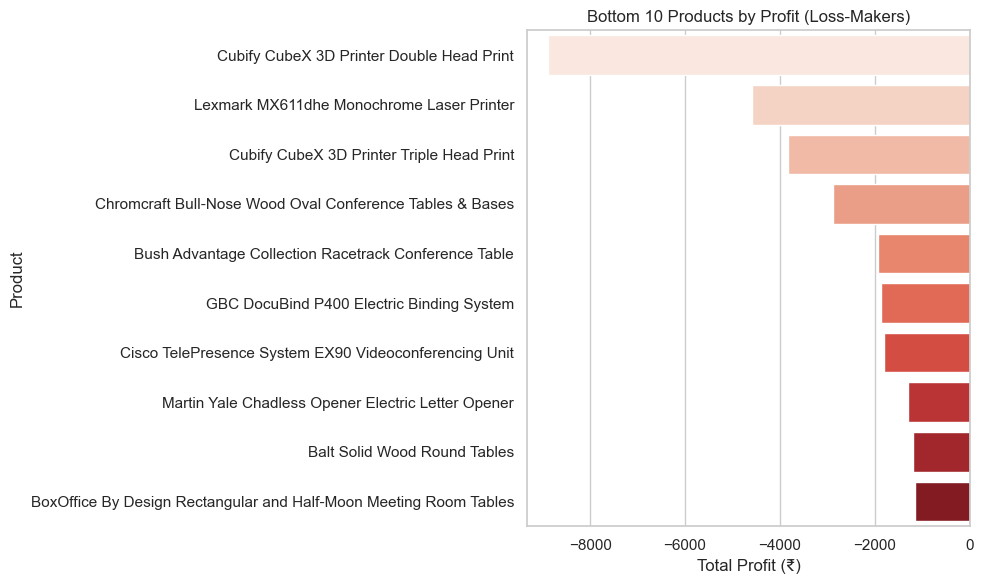

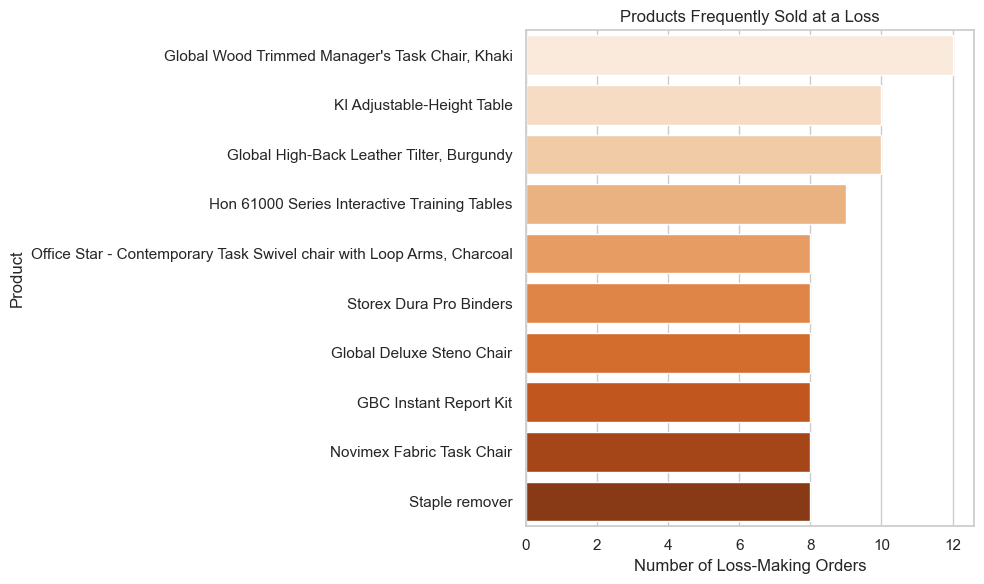

In [4]:
# Top 10 Products by Sales
top_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales, y='Product Name', x='Sales', palette='Blues_r')
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product")
plt.tight_layout()
plt.savefig("../images/top_products.png")
plt.show()

# Bottom 10 Products by Profit
bottom_profit = df.groupby('Product Name')['Profit'].sum().sort_values().head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_profit, y='Product Name', x='Profit', palette='Reds')
plt.title("Bottom 10 Products by Profit (Loss-Makers)")
plt.xlabel("Total Profit (₹)")
plt.ylabel("Product")
plt.tight_layout()
plt.savefig("../images/bottom_products.png")
plt.show()

# Products with Negative Profit
negative_profit_products = df[df['Profit'] < 0]['Product Name'].value_counts().head(10).reset_index()
negative_profit_products.columns = ['Product Name', 'Loss Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=negative_profit_products, y='Product Name', x='Loss Count', palette='Oranges')
plt.title("Products Frequently Sold at a Loss")
plt.xlabel("Number of Loss-Making Orders")
plt.ylabel("Product")
plt.tight_layout()
plt.savefig("../images/Products_Frequently_Sold_at_a_Loss.png")
plt.show()
